# Coffee Shop Anomaly Detection

A coffee shop based in NYC is trying to reduce the amount of waste regarding their pastries.
The goal is to implement Machine Learning algorithms to predict and find anomalies in the data.

In [68]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
import matplotlib.dates as md
from sklearn import preprocessing

## Load Data from CSV

In [69]:
dataset = pd.read_csv(
    '../models/coffee-shop/pastry inventory.csv',
    encoding='unicode_escape'
)

## Pre-processing

In [70]:
# create column of total made pastries of a given day
dataset['total_made'] = dataset["waste"] + dataset["quantity_sold"]
# convert to datetime object
dataset['date'] = pd.to_datetime(dataset['transaction_date'], format='%m/%d/%Y')
# weekday from 0 to 6
dataset['weekday'] = dataset['date'].dt.dayofweek

## About Data

In [71]:
# print first 10 rows of dataset to better understand general data
dataset.head(10)

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste,total_made,date,weekday
0,3,4/1/2019,69,18,8,10,56%,18,2019-04-01,0
1,3,4/1/2019,70,18,12,6,33%,18,2019-04-01,0
2,3,4/1/2019,71,18,8,10,56%,18,2019-04-01,0
3,3,4/1/2019,72,48,9,39,81%,48,2019-04-01,0
4,3,4/1/2019,73,18,9,9,50%,18,2019-04-01,0
5,3,4/2/2019,69,18,7,11,61%,18,2019-04-02,1
6,3,4/2/2019,70,18,10,8,44%,18,2019-04-02,1
7,3,4/2/2019,71,18,10,8,44%,18,2019-04-02,1
8,3,4/2/2019,72,48,10,38,79%,48,2019-04-02,1
9,3,4/2/2019,73,18,9,9,50%,18,2019-04-02,1


In [72]:
# shows number of rows and columns
dataset.shape

(307, 10)

In [73]:
# gives general useful info about dataset such as null count and type of each column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   sales_outlet_id   307 non-null    int64         
 1   transaction_date  307 non-null    object        
 2   product_id        307 non-null    int64         
 3   start_of_day      307 non-null    int64         
 4   quantity_sold     307 non-null    int64         
 5   waste             307 non-null    int64         
 6   % waste           307 non-null    object        
 7   total_made        307 non-null    int64         
 8   date              307 non-null    datetime64[ns]
 9   weekday           307 non-null    int64         
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 24.1+ KB


### Data Visualization

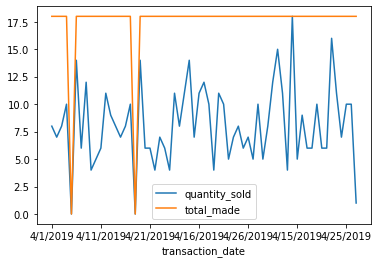

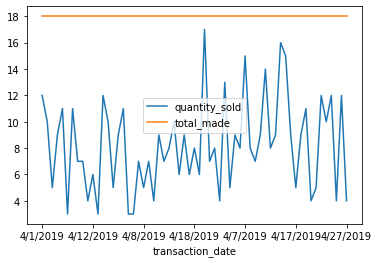

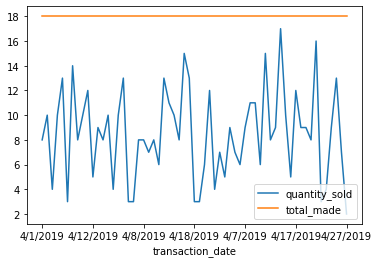

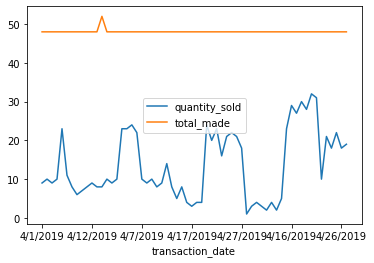

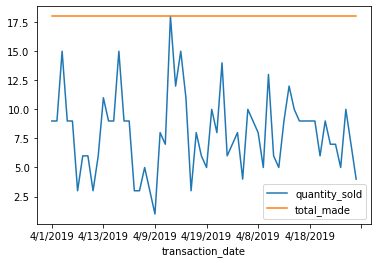

In [74]:
# compares amount sold vs total amount for every product
for i in range(69, 74):
    product = dataset[dataset.product_id == i]
    product.plot(x='transaction_date', y=['quantity_sold', 'total_made'])

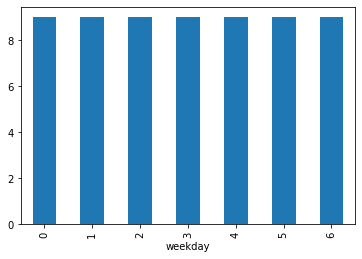

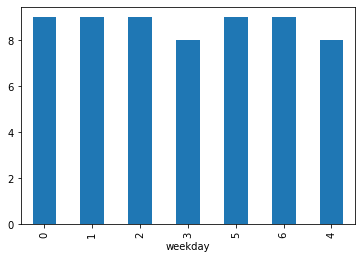

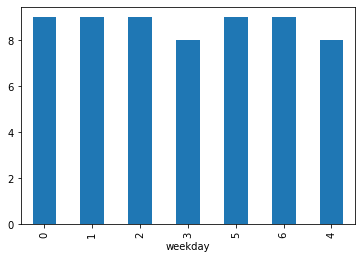

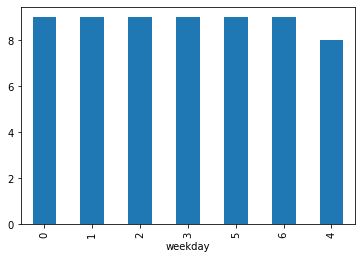

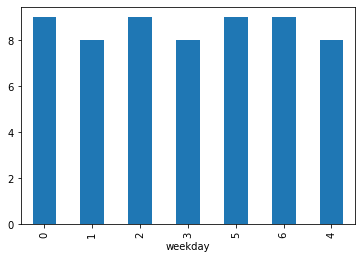

In [75]:
# shows how much a given product is sold according to the weekday
for i in range(69, 74):
    product = dataset[dataset.product_id == i]
    product['quantity_sold'].groupby(product['weekday'], sort=False).count().plot(kind='bar')
    plt.show()

## Feature selection/extraction

In [76]:
x = dataset[['date']]
x[0:20]

,date
0,2019-04-01
1,2019-04-01
2,2019-04-01
3,2019-04-01
4,2019-04-01
5,2019-04-02
6,2019-04-02
7,2019-04-02
8,2019-04-02
9,2019-04-02


In [77]:
y = dataset['quantity_sold']
y[0:20]

0      8
1     12
2      8
3      9
4      9
5      7
6     10
7     10
8     10
9      9
10     8
11     5
12     4
13     9
14    15
15    10
16     9
17    10
18    10
19     9
Name: quantity_sold, dtype: int64

In [78]:
x = preprocessing.StandardScaler().fit(x).transform(x)

## K Nearest Neighbors (KNN)

In [79]:
# from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (214, 1) (214,)
Test set: (93, 1) (93,)


In [80]:
from sklearn.neighbors import KNeighborsClassifier
k = 7
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat1 = neigh.predict(X_test)
yhat1[0:20]

array([ 3,  9,  9,  7, 10,  6,  5,  8,  3,  6,  6,  7, 10,  9,  9,  7, 11,
        6,  9,  3], dtype=int64)

Train set Accuracy:  0.2523364485981308
Test set Accuracy:  0.12903225806451613


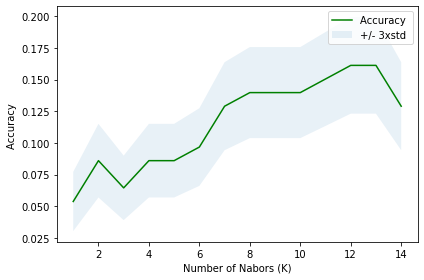

The best accuracy was with 0.16129032258064516 with k= 12


In [81]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat1))
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat1=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat1)


    std_acc[n-1]=np.std(yhat1==y_test)/np.sqrt(yhat1.shape[0])

mean_acc
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [86]:
from sklearn.metrics import mean_absolute_error

for n in range(1, 20):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat1 = neigh.predict(X_test)
    print(n, mean_absolute_error(y_test.values, yhat1))

1 6.118279569892473
2 5.021505376344086
3 5.204301075268817
4 5.279569892473118
5 4.989247311827957
6 5.075268817204301
7 4.838709677419355
8 4.645161290322581
9 4.602150537634409
10 4.688172043010753
11 4.645161290322581
12 4.344086021505376
13 4.43010752688172
14 4.397849462365591
15 4.559139784946237
16 4.56989247311828
17 4.623655913978495
18 4.612903225806452
19 4.580645161290323


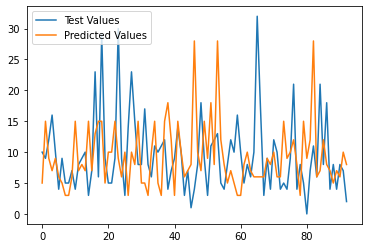

In [87]:
neigh = KNeighborsClassifier(n_neighbors = 1).fit(X_train,y_train)
yhat1 = neigh.predict(X_test)
plt.plot(y_test.values)
plt.plot(yhat1)
plt.legend(('Test Values', 'Predicted Values'))